In [1]:
import numpy as np
import argparse
import os

from pykin.utils import plot_utils as p_utils
from pytamp.benchmark import Benchmark3_for_rearr as Benchmark3
# from pytamp.benchmark import Benchmark3

from pytamp.search.mcts_for_rearragement import MCTS_rearrangement 


# ? python3 benchmark2_test.py --budgets 100 --max_depth 14 --seed 1 --algo bai_perturb
parser = argparse.ArgumentParser(description="Test Benchmark 3.")
parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
parser.add_argument("--max_depth", metavar="H", type=int, default=12, help="Max depth")
parser.add_argument("--seed", metavar="i", type=int, default=16, help="A random seed")
parser.add_argument(
    "--algo",
    metavar="alg",
    type=str,
    default="uct",
    choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
    help="Choose one (bai_perturb, bai_ucb, uct)",
)
parser.add_argument(
    "--debug_mode",
    default=False,
    type=lambda x: (str(x).lower() == "true"),
    help="Debug mode",
)
parser.add_argument(
    "--bottle_number",
    metavar="N",
    type=int,
    default=3,
    help="Bottle Number(6 or less.)",
)
try:
    args = parser.parse_args() #call from command line
except:
    args = parser.parse_args(args=[]) #call from notebook
    

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
number = args.bottle_number
np.random.seed(seed)

benchmark3 = Benchmark3(robot_name="panda", geom="collision", is_pyplot=False)


2023-08-07 18:59:35.564621: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
                             [--bottle_number N]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-39bbdca2-64fe-45cf-a3f0-4b9882079596.json


*********************** Logical States ***********************
OrderedDict([('rect_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('rect_box1',
              {'on': Object(name=rect_box0, pos=[0.72       0.3        0.79294036])}),
             ('rect_box2',
              {'on': Object(name=rect_box1, pos=[0.72       0.3        0.86631922])}),
             ('square_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('square_box1',
              {'on': Object(name=square_box0, pos=[0.8        0.4        0.79125948])}),
             ('square_box2',
              {'on': Object(name=square_box1, pos=[0.8        0.4        0.86225948])}),
             ('goal_can',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73547763])}),
             ('milk1',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73547763])}),
             ('milk2',
              {'on': Object(name=clea

In [2]:
for n, m in benchmark3.init_scene._support_objects.items():
    print(n)

table
tray_blue


{'table': Object(name=table, pos=[ 1.   -0.6  -0.03]), 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]), 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]), 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]), 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]), 'square_box1': Object(name=square_box1, pos=[0.8        0.4        0.86225948]), 'square_box2': Object(name=square_box2, pos=[0.8        0.4        0.93325948]), 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]), 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]), 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]), 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]), 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]), 'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]), 'tray_blue': Object(name=tray_blue, pos=[0.6 

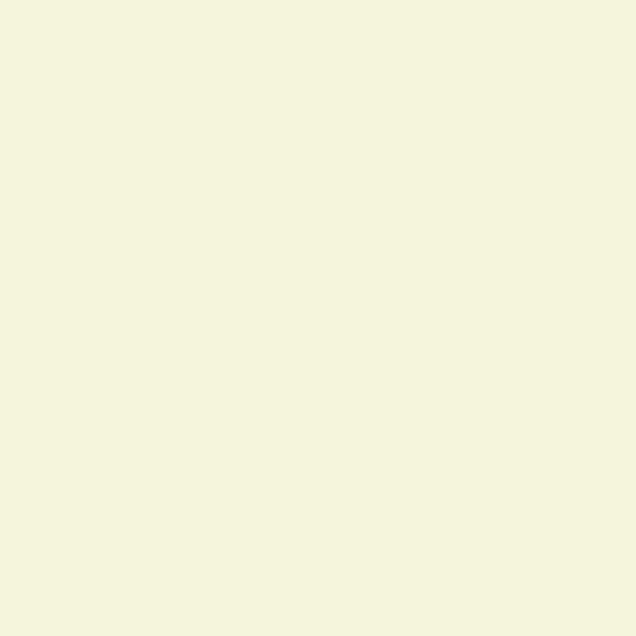

In [2]:
fig, ax = p_utils.init_3d_figure(name="Benchamrk 1")
# init_scene
benchmark3.scene_mngr.render_scene(ax)
benchmark3.render_axis(benchmark3.scene_mngr)
benchmark3.scene_mngr.show()


In [3]:

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)
# c_list = c_list[6:]
c = 2.5

mcts = MCTS_rearrangement(
    scene_mngr=benchmark3.scene_mngr,
    init_scene = benchmark3.init_scene,
    sampling_method=algo,
    budgets=budgets,
    max_depth=max_depth,
    c=c_list[6],
    debug_mode=debug_mode,
    use_pick_action=False,
    consider_next_scene=False,
    do_level_2=True,
    
)

mcts.only_optimize_1 = False

2023-08-07 19:00:28.989316: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-07 19:00:29.015173: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 19:00:29.015492: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-08-07 19:00:29.015547: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-07 19:00:29.021499: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-07 19:00:29.021587: I tensorflow/strea

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-07 19:00:32.224102: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 19:00:32.224822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 19:00:32.224948: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-08-07 19:00:32.225039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negati

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-07 19:00:32.588609: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-07 19:00:32.588644: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-07 19:00:32.588662: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-07 19:00:32.588934: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 19:00:32.589081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 19:00:32.589192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [4]:
import time
start_time = time.time()
idx = 0 


for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {benchmark3.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 1 ===========
[Action] Rearr rect_box2 to table
[Reward] S(0) -> A(1) -> S'(8) Reward : -0.1
[Action] Rearr milk2 to table
[Reward] S(8) -> A(11) -> S'(15) Reward : -0.1
[Action] Rearr goal_can to tray_blue
[Reward] S(15) -> A(17) -> S'(18) Reward : -0.1
Success!!!!!
Terminal State! Reward is 10
rect_box2
Extracted Region Cube Size:  0.4
Random sample points 


2023-08-07 19:00:34.182799: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-08-07 19:00:34.636019: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-08-07 19:00:35.413724: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-07 19:00:36.030932: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-08-07 19:00:36.538328: W tensorflow/core/common_runtime/bfc_allocator.cc:337] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact.

Generated 24 grasps for object rect_box2
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0081 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0035 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0035 sec

milk2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 3 grasps for object milk2
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0162 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0051 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0066 sec

goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
This optimal subnodes([0, 1, 8, 11, 15, 17, 18]) is infeasible subnodes.
 level 2 value : -inf 
Add lev

Generated 1 grasps for object goal_can
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0126 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0052 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0045 sec

This optimal subnodes([0, 3, 32, 36, 39, 40, 45, 48, 49]) is infeasible subnodes.
 level 2 value : -inf 
Add level_1_node!
########### Running time :  13.651028394699097 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 4 ===========
[Action] Rearr milk2 to table
[Reward] S(0) -> A(4) -> S'(50) Reward : -0.1
[Action] Rearr goal_can to tray_blue
[Reward] S(50) -> A(56) -> S'(57) Reward : -0.1
Success!!!!!
Terminal State! Reward is 10
milk2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 2 grasps for object milk2
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0126 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0043 sec

s

WorkingTime[inverse_kinematics]: 0.1024 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0452 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0028 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0028 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0025 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1005 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0475 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0023 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0023 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0022 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0996 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0729 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0023 sec

solve the problem using LM2!! 
WorkingTime[

Generated 22 grasps for object milk4
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0118 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0021 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0020 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0021 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0021 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0068 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0021 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0023 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0028 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0023 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1017 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0091 sec

solve the problem using LM2!! 
WorkingTime[inverse_

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Generated 9 grasps for object goal_can
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0119 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0054 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0074 sec

pick milk2
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0146 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 4.402
WorkingTime[run]: 2.9808 sec

WorkingTime[run]: 0.1072 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1110 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000025
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000005
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


Cost is 4.491
WorkingTime[run]: 2.9034 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0104 sec

{('milk2', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(name=square_box1, pos=[0.8        0.4        0.86225948]),
 'square_box2': Object(name=square_box2, p

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000024
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


WorkingTime[inverse_kinematics]: 0.0103 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0129 sec

{('milk2', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(name=square_box1, pos=[0.8        0.4        0.86225948]),
 'square_box2': Object(name=square_box2, 

[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004
[WARNING] [RRT Star Planner]: Occur Collision for goal joints


{('milk2', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(name=square_box1, pos=[0.8        0.4        0.86225948]),
 'square_box2': Object(name=square_box2, pos=[0.8        0.4        0.93325948]),
 'table': Object(name=table, pos=[ 1.   -0.6  -0.03]),
 'tray_blue': Object(name

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000007
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[ERROR] [RRT Star Planner]: Not found IK solution


WorkingTime[inverse_kinematics]: 0.0167 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0140 sec

{('milk2', 'clearbox')}
*********************** Scene ***********************
{'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=square_box0, pos=[0.8        0.4        0.79125948]),
 'square_box1': Object(name=square_box1, pos=[0.8        0.4        0.86225948]),
 'square_box2': Object(name=square_box2, 

Extracted Region Cube Size:  0.4134366168168355
Random sample points 
Generated 9 grasps for object milk3
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (54, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for milk3
Extracted Region Cube Size:  0.4142380687027134
Random sample points 
Generated 14 grasps for object milk3
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0155 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0069 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0056 sec

goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
This optimal subnodes([0, 1, 8, 9, 117, 119, 122, 126, 127]) is infeasible subnodes.
 level 2 value : -inf 
Add level_1_n

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 2 grasps for object goal_can
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0111 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0044 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0044 sec

pick milk3
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0106 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 2.586
WorkingTime[run]: 3.1316 sec

WorkingTime[run]: 0.1264 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1121 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.547
WorkingTime[run]: 2.5693 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0092 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Retry Generate Path, the number of retries is 1/5 

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0191 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0122 sec



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Retry Generate Path, the number of retries is 2/5 

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0148 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0144 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0124 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0176 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0181 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0121 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0108 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0129 sec



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..


Retry Generate Path, the number of retries is 3/5 

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0138 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0166 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0143 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0173 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0212 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0179 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0151 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0135 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0101 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0084 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0124 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0109 sec

solve the problem using LM2!! 
Worki

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


WorkingTime[inverse_kinematics]: 0.0109 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0116 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0157 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0098 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0079 sec



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 2.641
WorkingTime[run]: 23.1338 sec

WorkingTime[run]: 0.1088 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1186 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000006


Cost is 2.392
WorkingTime[run]: 2.9299 sec

post processing for video save : Joint path : milk3 [[ 0.21511324 -0.97658911  0.          0.38576534]
 [ 0.97658911  0.21511324  0.          0.48563518]
 [ 0.          0.          1.          0.82393415]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick rect_box2
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0115 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 3.351
WorkingTime[run]: 2.8953 sec

WorkingTime[run]: 0.1037 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1112 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000007


Cost is 3.273
WorkingTime[run]: 2.9806 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0098 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0123 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0151 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000014


Retry Generate Path, the number of retries is 1/5 

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0142 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0109 sec



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000009


Retry Generate Path, the number of retries is 2/5 

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0129 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0081 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0072 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0149 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0176 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0139 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0132 sec



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 4.499
WorkingTime[run]: 14.0561 sec

WorkingTime[run]: 0.1021 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1059 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000008


Cost is 4.664
WorkingTime[run]: 2.9627 sec

post processing for video save : Joint path : rect_box2 [[ 0.5095677  -0.86042674  0.00256506  0.44369126]
 [ 0.86042989  0.5095613  -0.00277164  0.22229421]
 [ 0.00107773  0.0036194   0.99999287  0.77243664]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick goal_can
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0094 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000005
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 2.485
WorkingTime[run]: 2.9203 sec

WorkingTime[run]: 0.1036 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1089 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.693
WorkingTime[run]: 2.9054 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0078 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning


Cost is 2.151
WorkingTime[run]: 3.1077 sec

WorkingTime[run]: 0.1033 sec



[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


WorkingTime[run]: 0.1095 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30


Cost is 2.29
WorkingTime[run]: 3.0138 sec

post processing for video save : Joint path : goal_can [[ 0.86250094  0.50605547  0.          0.61140375]
 [-0.50605547  0.86250094  0.          0.05872966]
 [ 0.          0.          1.          0.82659338]
 [ 0.          0.          0.          1.        ]]
Success pnp
History : 8.200000000000001 value_sum : 0.10720000000000002
Update Sub optimal Nodes!! Value is 8.3072.
 level 2 value : 8.3072 
History : 8.200000000000001 value_sum : 0.10720000000000002
Add level_1_node!
Add level_2_node!
########### Running time :  115.68552803993225 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 12 ===========
[Action] Rearr milk2 to table
[Reward] S(0) -> A(4) -> S'(50) Reward : -0.1
[Action] Rearr square_box2 to table
[Reward] S(50) -> A(52) -> S'(140) Reward : -0.1
[Action] Rearr milk4 to table
[Reward] S(140) -> A(144) -> S'(146) Reward : -0.1
[Action] Rearr milk3 to table
[Reward] S(146) -> A(149) -> S

WorkingTime[inverse_kinematics]: 0.0034 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1066 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0792 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0027 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0025 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1067 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1080 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0390 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1042 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0462 sec

solve the problem using LM2!! 
WorkingTime[

[Action] Rearr goal_can to tray_blue
[Reward] S(182) -> A(185) -> S'(186) Reward : -0.1
Success!!!!!
Terminal State! Reward is 10
already has grasp_poses
milk1
Extracted Region Cube Size:  0.4009805715280448
Random sample points 
Generated 2 grasps for object milk1
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1259 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1076 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0065 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0023 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0023 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1060 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0455 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem using LM2!! 
WorkingTime[inverse

Generated 44 grasps for object milk2
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0148 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0055 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0074 sec

milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 5 grasps for object milk1
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1429 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1065 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1064 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0529 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0029 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1209 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1005 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem using LM2!! 

WorkingTime[inverse_kinematics]: 0.1221 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0032 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0031 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 2 grasps for object milk1
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1332 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1356 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1061 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0240 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1081 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0831 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 

Generated 22 grasps for object milk4
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0120 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0035 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0026 sec

square_box2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 47 grasps for object square_box2
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1026 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1013 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0025 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0027 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0027 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0837 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem

[Reward] S(238) -> A(240) -> S'(243) Reward : -0.1
[Action] Rearr goal_can to tray_blue
[Reward] S(243) -> A(246) -> S'(247) Reward : -0.1
Success!!!!!
Terminal State! Reward is 10
already has grasp_poses
milk3
Extracted Region Cube Size:  0.41527666214557124
Random sample points 
Generated 14 grasps for object milk3
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0080 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0034 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0034 sec

milk1
Extracted Region Cube Size:  0.40096064940960896
Random sample points 
Generated 2 grasps for object milk1
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0996 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1049 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1047 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0292 sec

solve the problem using LM2!! 
Worki

Generated 1 grasps for object goal_can
solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0161 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0069 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0071 sec

A value of this optimal nodes is lower than maximum value.
 level 2 value : 8.3072 
Add level_1_node!
########### Running time :  170.30899691581726 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 23 ===========
[Action] Rearr milk3 to table
[Reward] S(0) -> A(5) -> S'(58) Reward : -0.1
[Action] Rearr milk4 to table
[Reward] S(58) -> A(63) -> S'(264) Reward : -0.1
[Action] Rearr square_box2 to table
[Reward] S(264) -> A(266) -> S'(269) Reward : -0.1
[Action] Rearr milk1 to table
[Reward] S(269) -> A(272) -> S'(275) Reward : -0.1
[Action] Rearr square_box1 to table
[Reward] S(275) -> A(277) -> S'(279) Reward : -0.1
[Action] Rearr goal_can to tray_blue
[Reward] S(279) -> A(281) 

WorkingTime[inverse_kinematics]: 0.1091 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0735 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0026 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0025 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1115 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1098 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1076 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0488 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0024 sec

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.1149 sec

solve the problem using LM2!! 



KeyboardInterrupt



In [5]:
mcts.history_level_2_dict

{0: {'nodes': [0, 5, 58, 59, 135, 138, 139], 'value': 8.3072}}

In [7]:
mcts.tree.nodes[1]

{'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7ffa720c41c0>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'rect_box2',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[-0.90710105, -0.42090549,  0.00250105,  0.8403828 ],
           [ 0.42091154, -0.90709728,  0.00282953, -0.25065267],
           [ 0.00107773,  0.0036194 ,  0.99999287,  0.77243664],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 9.0,
 'value_history': [7.0,
  6.0,
  8.0,
  5.0,
  9.0,
  9.0,
  7.0,
  4.0,
  7.0,
  9.0,
  5.0,
  5.0,
  3.0,
  2.0,
  9.0,
  7.0],
 'visit': 16,
 'number': 1,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': False,
 'level1_5': True,
 'success': True,
 'cost': 0,
 'test': (),
 'grasp_set': array([[[ 0.95124402, -0.0739402 ,  0.29944563,  0.69392733],
         [-0.06816376, -0.99723184, -0.02970542,  0.30609078],
         [ 0.30081315,  0.00784575, -0.95365082,  1.04877219],
         [ 0.        ,  0.        ,  0.      

In [19]:
mcts.tree.nodes[33]

{'number': 33,
 'visit': 16,
 'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7ff95e372820>,
 'action': {'table': array([[-0.90710105, -0.42090549,  0.00250105,  0.8403828 ],
         [ 0.42091154, -0.90709728,  0.00282953, -0.25065267],
         [ 0.00107773,  0.0036194 ,  0.99999287,  0.77243664],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'grasp': array([[ 0.95124402, -0.0739402 ,  0.29944563,  0.69392733],
         [-0.06816376, -0.99723184, -0.02970542,  0.30609078],
         [ 0.30081315,  0.00784575, -0.95365082,  1.04877219],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'pre_grasp': array([[ 0.951244  , -0.0739402 ,  0.29944563,  0.6789551 ],
         [-0.06816376, -0.99723184, -0.02970542,  0.30757606],
         [ 0.30081314,  0.00784575, -0.95365083,  1.0964547 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
        dtype=float32),
  'post_grasp': array([[ 0.951244  , -0.0739402 ,  0.29944563,  0.69392735],

In [8]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value = mcts.history_level_1_dict[1]

print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
#     j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    max_value_nodes = mcts.get_minimum_cost_node()
    
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

{'nodes': [0, 2, 19, 23, 27, 30, 31], 'value': 8.200000000000001} {0: {'nodes': [0, 1, 8, 11, 15, 17, 18], 'value': 8.200000000000001}, 1: {'nodes': [0, 2, 19, 23, 27, 30, 31], 'value': 8.200000000000001}, 2: {'nodes': [0, 3, 32, 36, 39, 40, 45, 48, 49], 'value': 7.600000000000001}, 3: {'nodes': [0, 4, 50, 56, 57], 'value': 8.8}, 4: {'nodes': [0, 5, 58, 60, 65, 67, 70, 71, 75, 76, 79, 80, 82, 83, 84], 'value': 5.8000000000000025}, 5: {'nodes': [0, 6, 85, 86, 90, 91, 95, 96, 98, 100, 101], 'value': 7.000000000000002}, 6: {'nodes': [0, 7, 102], 'value': 9.4}, 7: {'nodes': [0, 4, 50, 51, 103, 104, 109, 111, 113, 115, 116], 'value': 7.000000000000002}, 8: {'nodes': [0, 1, 8, 9, 117, 119, 122, 126, 127], 'value': 7.600000000000001}, 9: {'nodes': [0, 6, 85, 87, 128, 133, 134], 'value': 8.200000000000001}, 10: {'nodes': [0, 5, 58, 59, 135, 138, 139], 'value': 8.200000000000001}, 11: {'nodes': [0, 4, 50, 52, 140, 144, 146, 149, 151, 152, 154, 155, 157, 158, 160, 161, 163, 164, 165], 'value': 4

In [9]:
print(minimum_cost_nodes)

NameError: name 'minimum_cost_nodes' is not defined

In [ ]:
# ,mcts.tree.nodes[]
print(minimum_cost_nodes)

mcts.tree.nodes[357].get('test')

In [11]:
minimum_cost_nodes = mcts.get_minimum_cost_node()

In [15]:
mcts.tree.nodes[33]['test'] = (mcts.tree.nodes[1]['action']['rearr_obj_name'], mcts.tree.nodes[1]['action']['rearr_poses'][0][mcts.tree.nodes[1]['action']['place_obj_name']])

In [11]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [12]:
final_pnp_all_joint_paths

[[[OrderedDict([('pre_grasp',
                 [array([ 8.01658692e-03, -5.22603138e-01,  4.24148590e-03, -2.68424903e+00,
                         -1.34983887e-03,  2.22350111e+00, -7.73649838e-01]),
                  array([ 0.01603317, -0.5067281 ,  0.00848297, -2.67436746, -0.00269968,
                          2.22588716, -0.76190151]),
                  array([ 0.02404976, -0.49085305,  0.01272446, -2.66448588, -0.00404952,
                          2.2282732 , -0.75015319]),
                  array([ 0.03206635, -0.47497801,  0.01696594, -2.65460431, -0.00539936,
                          2.23065924, -0.73840486]),
                  array([ 0.04008293, -0.45910297,  0.02120743, -2.64472274, -0.00674919,
                          2.23304528, -0.72665654]),
                  array([ 0.04809952, -0.44322793,  0.02544892, -2.63484117, -0.00809903,
                          2.23543133, -0.71490821]),
                  array([ 0.05611611, -0.42735288,  0.0296904 , -2.62495959, -0.0094

0 scene
100 scene
200 scene
300 scene
400 scene
500 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


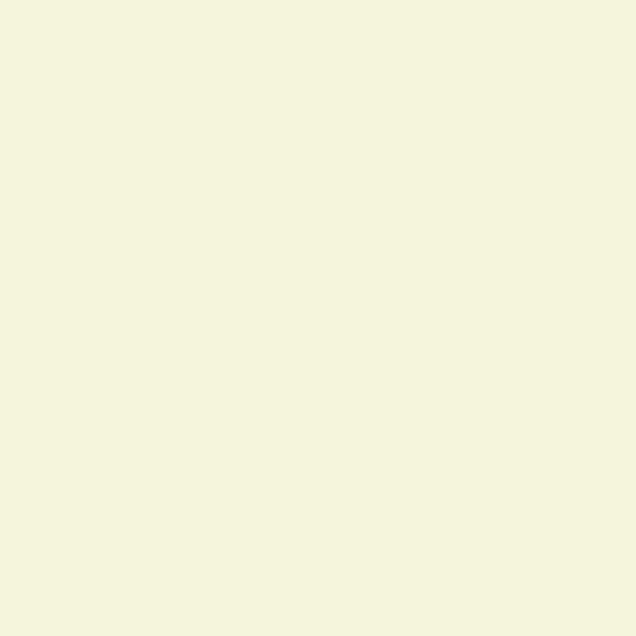

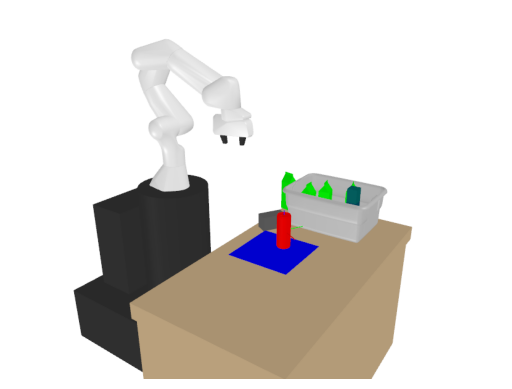

In [13]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="benchmark3_grasp_using_contact_graspnet_consider_next_scene",
)


In [17]:
mcts.history_level_2_dict

{0: {'nodes': [0, 1, 32, 33, 38, 42, 45, 47, 48], 'value': 6.18},
 1: {'nodes': [0, 4, 77, 78, 319, 321, 324, 325, 329, 331, 332],
  'value': 6.18}}

In [15]:
nodes

[0, 1, 32, 33, 39, 44, 47, 50, 52, 54, 55]

nodes [0, 1, 32, 33, 39, 44, 47, 50, 52, 54, 55]
Here doesn't have grasp


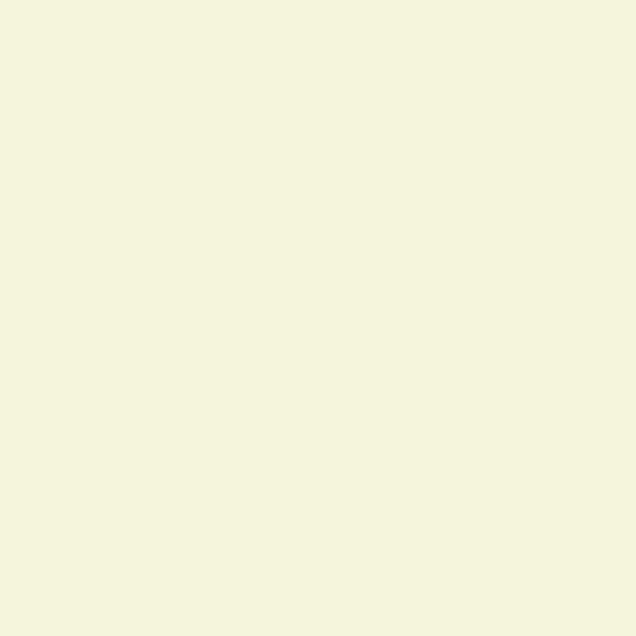

In [18]:
max_level_1_value = mcts.get_max_value_level_1()


fig, ax = p_utils.init_3d_figure(name="Level wise 1")

# nodes = mcts.infeasible_sub_nodes[0]
# nodes = mcts.history_level_1_dict[4]['nodes']
# j, nodes = mcts.get_max_value_nodes_level_1()

nodes = mcts.history_level_1_dict[4]['nodes']

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('grasp_poses')
    if grasp:
        grasp = grasp[0]['grasp']
    else:
        print("Here doesn't have grasp")
        
        mcts.rearr_action.scene_mngr.render_objects(ax)
        p_utils.plot_basis(ax)
        mcts.rearr_action.show()
        break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [33]:
nodes = mcts.history_level_1_dict[4]['nodes']

In [51]:
# from pytamp.utils.point_cloud_utils import get_combined_pc_from_mixed_scene
i = 0

current_node = mcts.tree.nodes[nodes[2*i + 1]]
next_node = mcts.tree.nodes[nodes[2*i + 2]]
obj_to_manipulate =current_node['action']['rearr_obj_name']

print(obj_to_manipulate)

grasps = mcts.grasp_generator.get_grasp(
    init_scene = benchmark3.init_scene,
    next_node = next_node,
    current_node = current_node,
    )

#next scene의 유무를 통해 combine하냐 마냐 나눠주는 함수 
# mcts.rearr_action.get_mixed_scene_on_next(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )

# mcts.rearr_action.get_mixed_scene_on_current(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )


# mcts.rearr_action.get_combined_pc_from_mixed_scene(
#                                                      next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                                                      current_scene=mcts.tree.nodes[max_value_nodes[2*i]]['state'],\
#                                                      obj_to_manipulate=obj_to_manipulate
#                                                      )



milk3
Extracted Region Cube Size:  0.4140609034817153
Random sample points 
Generated 9 grasps for object milk3


In [ ]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i) +1]]['state'])

for grasp in grasps :
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasp)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [20]:
obj_file_path = '/home/juju/contact_graspnet/acronym/meshes/5Shelves/4382a7a2860ff8dda67210eeab485ee6.obj'